In [ ]:
#Google drive save session
import os
import dill
from google.colab import drive

backup_dir = 'drive/My Drive/coadalab/Tamil'
backup_file = 'notebook_env.db'
backup_path = backup_dir + '/' + backup_file

def init_drive():
  # create directory if not exist
  drive.mount('drive')
  if not os.path.exists(backup_dir):
    !mkdir backup_dir

def restart_kernel():
  os._exit(00)

def save_session():
  init_drive()
  dill.dump_session(backup_path)

def load_session():
  init_drive()
  dill.load_session(backup_path)

In [1]:
# And pandas for data import
import pandas as pd

In [7]:
# Import Files
import os

# Import data from csv
data = pd.read_csv("/tmp/tamil_offensive_full_train.csv")
data_dev = pd.read_csv("/tmp/tamil_offensive_full_dev.csv")

# Select required columns
data = data[['text', 'label']]
data_dev = data_dev[['text', 'label']]

# Remove a row if any of the two remaining columns are missing
data = data.dropna();
data_dev = data_dev.dropna()

print(data)
print(data_dev)

                                                    text                                label
0                      movie vara level la Erika poguthu                        Not_offensive
1      I love Ajith Kumar Vivegam movie inki mjy bht ...                            not-Tamil
2              Padam nalla comedy padama irukum polaye..                        Not_offensive
3      karthick subburaj anne .... intha padam vetri ...                        Not_offensive
4      கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁                        Not_offensive
...                                                  ...                                  ...
35134  Trending number #2 idhukku nammalam karanamnu ...                        Not_offensive
35135                                 Movie script super   athuvum HIP HOP Tamizha music vera
35136                       Just 3k likes for 300k likes                        Not_offensive
35137                          Aaloo le lo. Kanda le lo.    

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14,16,17,18,20,21,22,23,24,25,26,27,28,29,32,35,37,39,45,57,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
# copy + klearn because you allways need sklearn
import copy
from sklearn.model_selection import train_test_split

In [9]:
# Remove rows, where the label is present only ones (can't be split)
data = data.groupby('label').filter(lambda x : len(x) > 1)
data_dev = data_dev.groupby('label').filter(lambda x : len(x) > 1)

# Remove rows, where the label is present only in the array
data = data[data.label.isin(['Not_offensive', 'Offensive_Targeted_Insult_Other', 'Offensive_Targeted_Insult_Individual', 'Offensive_Targeted_Insult_Group', 'not-Tamil', 'Offensive_Untargetede'])]
data_dev = data_dev[data_dev.label.isin(['Not_offensive', 'Offensive_Targeted_Insult_Other', 'Offensive_Targeted_Insult_Individual', 'Offensive_Targeted_Insult_Group', 'not-Tamil', 'Offensive_Untargetede'])]

# Set your model output as categorical and save in new label col
data['label_label'] = pd.Categorical(data['label'])
data_dev['label_label'] = pd.Categorical(data_dev['label'])

# Transform your output to numeric
data['label'] = data['label_label'].cat.codes
data_dev['label'] = data_dev['label_label'].cat.codes

print(data)
print(data_dev)

                                                    text  ...                           label_label
0                      movie vara level la Erika poguthu  ...                         Not_offensive
1      I love Ajith Kumar Vivegam movie inki mjy bht ...  ...                             not-Tamil
2              Padam nalla comedy padama irukum polaye..  ...                         Not_offensive
3      karthick subburaj anne .... intha padam vetri ...  ...                         Not_offensive
4      கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁  ...                         Not_offensive
...                                                  ...  ...                                   ...
35133  inda pathi like thala fans um thandrukanga da ...  ...  Offensive_Targeted_Insult_Individual
35134  Trending number #2 idhukku nammalam karanamnu ...  ...                         Not_offensive
35136                       Just 3k likes for 300k likes  ...                         Not_offensive


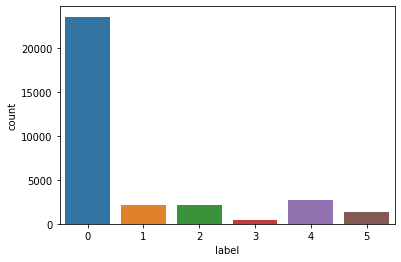

In [10]:
#Plot the bar chart of Train
import seaborn as sns

sns.countplot(x='label', data=data)

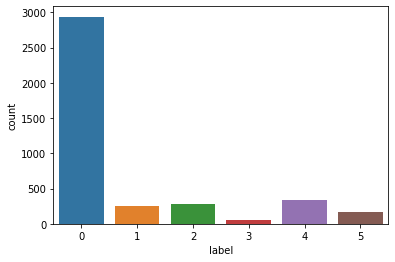

In [11]:
#Plot the bar chart of Dev
sns.countplot(x='label', data=data_dev)

In [12]:
# Load Huggingface transformers
!pip install transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast
from tensorflow.keras.models import Model

     |████████████████████████████████| 1.5MB 13.0MB/s 
     |████████████████████████████████| 2.9MB 19.4MB/s 
     |████████████████████████████████| 890kB 70.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=ff9e2541f081066ba10636f98929b993b021745c0f6ebe599ea529aef3d02216
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [13]:
#Setup BERT

# Name of the BERT model to use
model_name = 'bert-base-multilingual-cased'

# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)

# Load the Transformers BERT model
transformer_model = TFBertModel.from_pretrained(model_name, config = config)

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [14]:
# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.initializers import TruncatedNormal

In [15]:
#Build the model 

# Load the MainLayer
bert = transformer_model.layers[0]

# Max length of tokens
max_length = 100

# Build your model input
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
attention_mask = Input(shape=(max_length,), name='attention_mask', dtype='int32')
inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

# Load the Transformers BERT model as a layer in a Keras model
bert_model = bert(inputs)[1]
dropout = Dropout(config.hidden_dropout_prob, name='pooled_output')
pooled_output = dropout(bert_model, training=False)

# Then build your model output
label = Dense(units=len(data.label_label.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='class_type')(pooled_output)
outputs = {'label': label}

# And combine it all in a model object
model = Model(inputs=inputs, outputs=outputs, name='bert-base-multilingual-cased')

# Take a look at the model
model.summary()

Model: "bert-base-multilingual-cased"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
attention_mask (InputLayer)     [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_ids (InputLayer)          [(None, 100)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 177853440   attention_mask[0][0]             
                                                                 input_ids[0][0]                  
__________________________________________________________________________________________________
pooled_output (Dropout)         (None, 768)          0           bert[0

In [16]:
#Import Keras Libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

In [18]:
#Train the model

# Set an optimizer
optimizer = Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)

# Set loss and metrics
loss = {'label': CategoricalCrossentropy(from_logits = True)}
metric = {'label': CategoricalAccuracy('accuracy')}

# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

# Ready output data for the model
y_label = to_categorical(data['label'])

# Tokenize the input (takes some time)
x = tokenizer(
    text=data['text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

# Fit the model
history = model.fit(
    x={'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']},
    y={'label': y_label},
    validation_split=0.2,
    batch_size=64,
    epochs=50)

model.save("/tmp/text-classification-multi.h5")

Epoch 1/50
404/404 [==============================] - 204s 457ms/step - loss: 0.9323 - accuracy: 0.7153 - val_loss: 0.7145 - val_accuracy: 0.7645
Epoch 2/50
404/404 [==============================] - 182s 451ms/step - loss: 0.6759 - accuracy: 0.7666 - val_loss: 0.6678 - val_accuracy: 0.7756
Epoch 3/50
404/404 [==============================] - 182s 450ms/step - loss: 0.5926 - accuracy: 0.7911 - val_loss: 0.6702 - val_accuracy: 0.7762
Epoch 4/50
404/404 [==============================] - 182s 451ms/step - loss: 0.5480 - accuracy: 0.8027 - val_loss: 0.6804 - val_accuracy: 0.7663
Epoch 5/50
404/404 [==============================] - 183s 453ms/step - loss: 0.5037 - accuracy: 0.8221 - val_loss: 0.6877 - val_accuracy: 0.7742
Epoch 6/50
404/404 [==============================] - 182s 451ms/step - loss: 0.4753 - accuracy: 0.8353 - val_loss: 0.7032 - val_accuracy: 0.7722
Epoch 7/50
404/404 [==============================] - 182s 451ms/step - loss: 0.4573 - accuracy: 0.8408 - val_loss: 0.7080 -

In [19]:
# Model 2
# Ready output data for the model
y_label = to_categorical(data_dev['label'])

# Tokenize the input (takes some time)
x = tokenizer(
    text=data_dev['text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

# Fit the model
history = model.fit(
    x={'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']},
    y={'label': y_label},
    validation_split=0.2,
    batch_size=64,
    epochs=50)

Epoch 1/50
51/51 [==============================] - 23s 450ms/step - loss: 0.8780 - accuracy: 0.7605 - val_loss: 0.9430 - val_accuracy: 0.7522
Epoch 2/50
51/51 [==============================] - 23s 449ms/step - loss: 0.8662 - accuracy: 0.7543 - val_loss: 0.9098 - val_accuracy: 0.7571
Epoch 3/50
51/51 [==============================] - 23s 449ms/step - loss: 0.8077 - accuracy: 0.7679 - val_loss: 0.8767 - val_accuracy: 0.7497
Epoch 4/50
51/51 [==============================] - 23s 449ms/step - loss: 0.7897 - accuracy: 0.7592 - val_loss: 0.8412 - val_accuracy: 0.7509
Epoch 5/50
51/51 [==============================] - 23s 452ms/step - loss: 0.7600 - accuracy: 0.7645 - val_loss: 0.8234 - val_accuracy: 0.7485
Epoch 6/50
51/51 [==============================] - 23s 450ms/step - loss: 0.7378 - accuracy: 0.7710 - val_loss: 0.8036 - val_accuracy: 0.7472
Epoch 7/50
51/51 [==============================] - 23s 449ms/step - loss: 0.7130 - accuracy: 0.7744 - val_loss: 0.7947 - val_accuracy: 0.7522

In [ ]:
#Model 3

# Ready output data for the model
y_label = to_categorical(data['label'])

# Tokenize the input (takes some time)
x = tokenizer(
    text=data['text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

# Fit the model
history = model.fit(
    x={'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']},
    y={'label': y_label},
    validation_split=0.2,
    batch_size=64,
    epochs=50)

model.save("/tmp/text-classification-tamil.h5")

Epoch 1/50
404/404 [==============================] - 182s 451ms/step - loss: 0.2013 - accuracy: 0.9363 - val_loss: 0.9781 - val_accuracy: 0.7601
Epoch 2/50
404/404 [==============================] - 182s 450ms/step - loss: 0.2026 - accuracy: 0.9370 - val_loss: 0.9792 - val_accuracy: 0.7606
Epoch 3/50
404/404 [==============================] - 182s 451ms/step - loss: 0.1997 - accuracy: 0.9367 - val_loss: 0.9798 - val_accuracy: 0.7606
Epoch 4/50
404/404 [==============================] - 182s 451ms/step - loss: 0.1982 - accuracy: 0.9391 - val_loss: 0.9811 - val_accuracy: 0.7632
Epoch 5/50
404/404 [==============================] - 182s 450ms/step - loss: 0.2042 - accuracy: 0.9359 - val_loss: 0.9801 - val_accuracy: 0.7617
Epoch 6/50
404/404 [==============================] - 182s 451ms/step - loss: 0.1991 - accuracy: 0.9379 - val_loss: 0.9789 - val_accuracy: 0.7617
Epoch 7/50
404/404 [==============================] - 182s 450ms/step - loss: 0.2022 - accuracy: 0.9366 - val_loss: 0.9836 -

In [25]:
#Evaluate the model

# Ready test data`
test_y_label = to_categorical(data_dev['label'])
test_x = tokenizer(
    text=data_dev['text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)


# Run evaluation
model_eval = model.evaluate(
    x={'input_ids': test_x['input_ids'], 'attention_mask': test_x['attention_mask']},
    y={'label': test_y_label}
)

127/127 [==============================] - 11s 84ms/step - loss: 0.7449 - accuracy: 0.8158


In [26]:
#History object
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#import matplotlib
from matplotlib import pyplot as plt

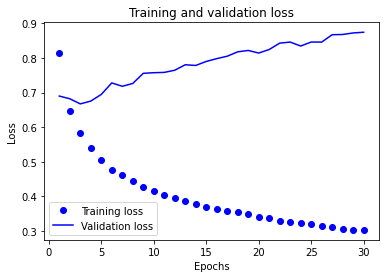

In [ ]:
#plot the training and validation loss for comparison

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

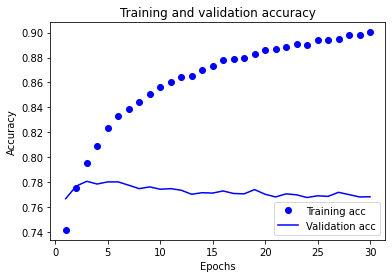

In [ ]:
#plot the training and validation accuracy for comparison
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
#Model Prediction
data_test = pd.read_csv("/tmp/tamil_offensive_full_test.csv")

# Select required columns
data_test = data_test[['text']]

# Remove a row if any of the three remaining columns are missing
data_test = data_test.dropna()

test_x = tokenizer(
    text=data_test['text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

predictions = model.predict({'input_ids': test_x['input_ids'], 'attention_mask': test_x['attention_mask']})
  

In [ ]:
print(len(data_test))
print(len(predictions['label']))

4391
4391


In [ ]:
#import Numpy
import numpy as np

In [ ]:
#Write out to the csv file
arry = []

data_test = np.array(data_test)
label_array = np.array(predictions['label'])

for i, j in zip(data_test, label_array):
  text = i[0]
  label_value_max = max(j)
  label_index = np.where(label_array == label_value_max)

  labels = ['Not_offensive', 'Offensive_Targeted_Insult_Group', 'Offensive_Targeted_Insult_Individual', 'Offensive_Targeted_Insult_Other', 'Offensive_Untargetede', 'not-Tamil']
  arry.append([text, labels[label_index[1][0]]])
  # print(i[0] + i[1] + ' - ' + labels[label_index[1][0]])


pre = pd.DataFrame(arry, columns=['text', 'label'])
pre.to_csv('/tmp/prediction-tamil.csv')